In [5]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [6]:
def load_reduced_lists(dirname,file_prefix,max_files,xfb=True,zfb = True,Iz=True,height=True,x_mean=True,y_mean=True,z_mean=True,qpd_sum=True):
    x_fb_list,z_fb_list, height_list,Iz_list,x_mean_list,y_mean_list,z_mean_list,qpd_sum_list= [ [] for x in range(8)]
    files = []
   
    [files.append(file_) for file_ in os.listdir(dirname) if file_.startswith(file_prefix) if file_.endswith('.h5')]
    files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))        
    step_size = 100
    for j in tqdm(np.arange(0,max_files,step_size)):
        BDFs = [BDF.BeadDataFile(dirname+filename) for filename in files[j:j+step_size]]
        for k in range(len(BDFs)):
            if(xfb==True):
                x_fb_list.append(BDFs[k].feedback[0].mean())
            if(zfb==True):
                z_fb_list.append(BDFs[k].feedback[2].mean())
            if(Iz==True):
                Iz_list.append(au_to_power(BDFs[k].Iz.mean()))
            if(height==True):
                height_list.append(BDFs[k].bead_height)
            if(x_mean==True):
                x_mean_list.append(BDFs[k].x2.mean())
            if(y_mean==True):
                y_mean_list.append(BDFs[k].y2.mean())
            if(z_mean==True):
                z_mean_list.append(BDFs[k].z2.mean())
            if(qpd_sum==True):
                qpd_sum_list.append(BDFs[k].quad_sum.mean())                
    return x_fb_list,z_fb_list,Iz_list,height_list,x_mean_list,y_mean_list,z_mean_list,qpd_sum_list                                 
                                 

    

In [7]:
def load_dir_reduced_to_zb(dirname,file_prefix,max_files):
    '''
    Load height information from the h5 files in a loop into a list. Step size is fixed to 100. 
    '''   
    ## Load all filenames in directory
    var_list = []
    files = []
    [files.append(file_) for file_ in os.listdir(dirname) if file_.startswith(file_prefix) if file_.endswith('.h5')]
    files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))        
    step_size = 100
    for j in tqdm(np.arange(0,max_files,step_size)):
        BDFs = [BDF.BeadDataFile(dirname+filename) for filename in files[j:j+step_size]]
        [var_list.append(BDFs[k].feedback[2].mean()) for k in range(len(BDFs))]
    return var_list

def load_dir_reduced_to_Iz(dirname,file_prefix,max_files):
    '''
    Load height information from the h5 files in a loop into a list. Step size is fixed to 100. 
    '''   
    ## Load all filenames in directory
    var_list = []
    files = []
    [files.append(file_) for file_ in os.listdir(dirname) if file_.startswith(file_prefix) if file_.endswith('.h5')]
    files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))        
    step_size = 100
    for j in tqdm(np.arange(0,max_files,step_size)):
        BDFs = [BDF.BeadDataFile(dirname+filename) for filename in files[j:j+step_size]]
        [var_list.append(au_to_power(BDFs[k].Iz.mean())) for k in range(len(BDFs))]
    return var_list

In [8]:
# load the files 
bead_date =20200713
bead_number = 1
dataset = "/Millicharge/WithSpin0714/"
FOI = "Discharge"
dirname ="/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number +dataset
filename = dirname + FOI


In [168]:
xfb,zfb,Iz,height,x_mean,y_mean,z_mean,qpd_sum = load_reduced_lists(dirname,FOI,1000)

100%|██████████| 10/10 [00:06<00:00,  1.70it/s]


(260.0, 285.0)

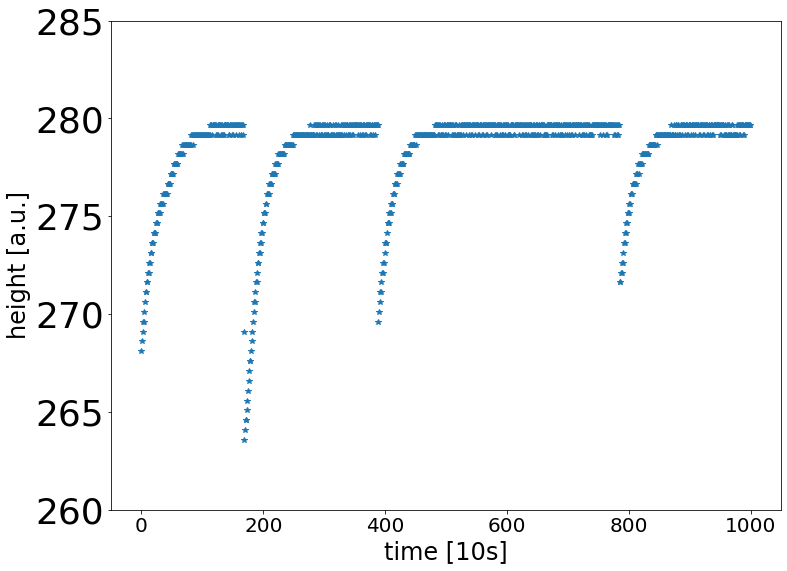

In [169]:
plt.plot(height,linestyle="",marker="*")
#plt.plot(zfb)
#plt.axvline(168,color="red",alpha=0.5)
#plt.axvline(388,color="red",alpha=0.5)
#plt.axvline(785,color="red",alpha=0.5)
plt.xlabel("time [10s]")
plt.ylabel("height [a.u.]")
plt.ylim(260,285)

Text(0, 0.5, 'z_fb [a.u.]')

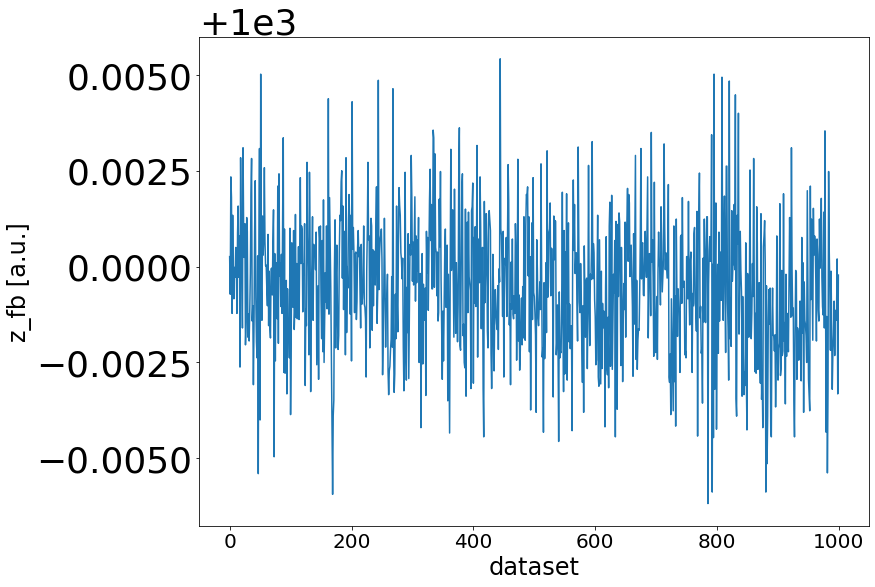

In [177]:
plt.plot(xfb)
#plt.axvline(168,color="red",alpha=0.5)
#plt.axvline(388,color="red",alpha=0.5)
#plt.axvline(785,color="red",alpha=0.5)
plt.xlabel("dataset")
plt.ylabel("z_fb [a.u.]")

Text(0, 0.5, 'z_fb [a.u.]')

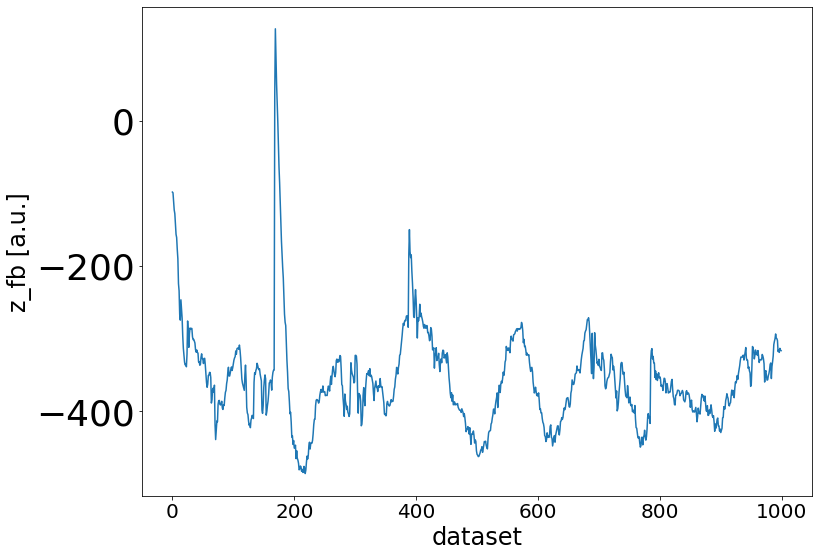

In [170]:
plt.plot(zfb)
#plt.axvline(168,color="red",alpha=0.5)
#plt.axvline(388,color="red",alpha=0.5)
#plt.axvline(785,color="red",alpha=0.5)
plt.xlabel("dataset")
plt.ylabel("z_fb [a.u.]")

Text(0, 0.5, 'z_fb [a.u.]')

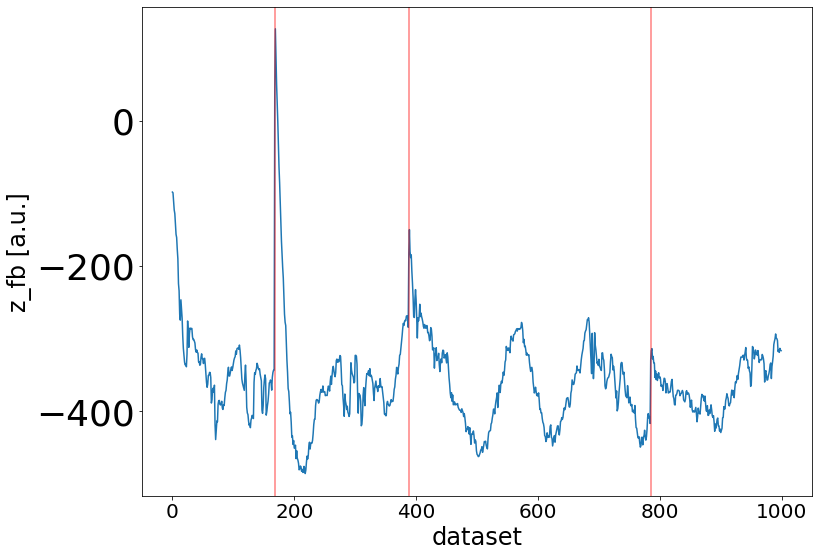

In [171]:
plt.plot(zfb)
plt.axvline(168,color="red",alpha=0.5)
plt.axvline(388,color="red",alpha=0.5)
plt.axvline(785,color="red",alpha=0.5)
plt.xlabel("dataset")
plt.ylabel("z_fb [a.u.]")

Text(0.5, 0, 'dataset')

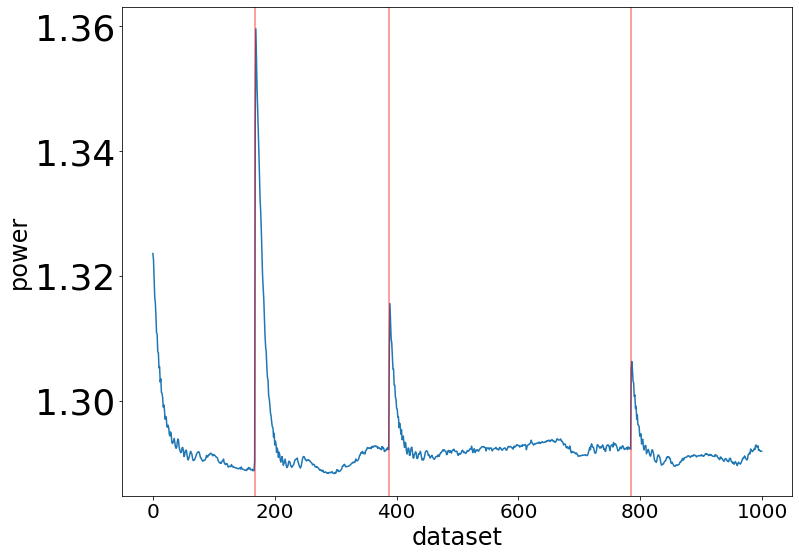

In [172]:
plt.plot(Iz)
plt.axvline(168,color="red",alpha=0.5)
plt.axvline(388,color="red",alpha=0.5)
plt.axvline(785,color="red",alpha=0.5)
plt.ylabel("power")
plt.xlabel("dataset")

(-0.08, -0.02)

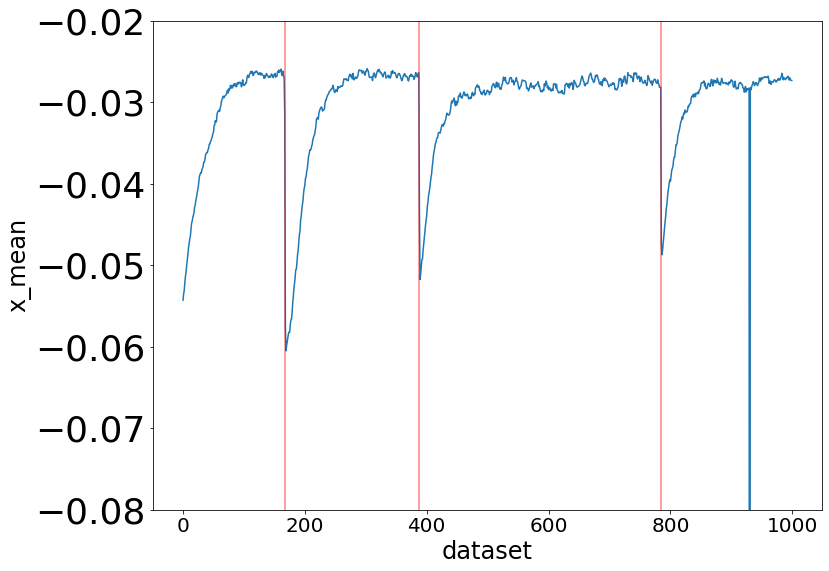

In [173]:
plt.plot(x_mean)
plt.axvline(168,color="red",alpha=0.5)
plt.axvline(388,color="red",alpha=0.5)
plt.axvline(785,color="red",alpha=0.5)
plt.ylabel("x_mean")
plt.xlabel("dataset")
plt.ylim(-0.08,-0.02)

(-0.15, -0.07)

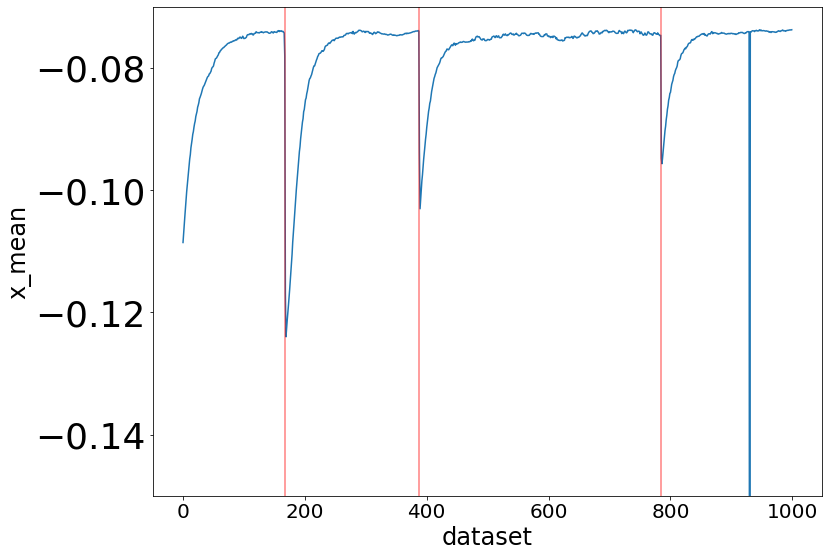

In [174]:
plt.plot(y_mean)
plt.axvline(168,color="red",alpha=0.5)
plt.axvline(388,color="red",alpha=0.5)
plt.axvline(785,color="red",alpha=0.5)
plt.ylabel("x_mean")
plt.xlabel("dataset")
plt.ylim(-0.15,-0.07)

(5842.48569882208, 11684971.39764416)

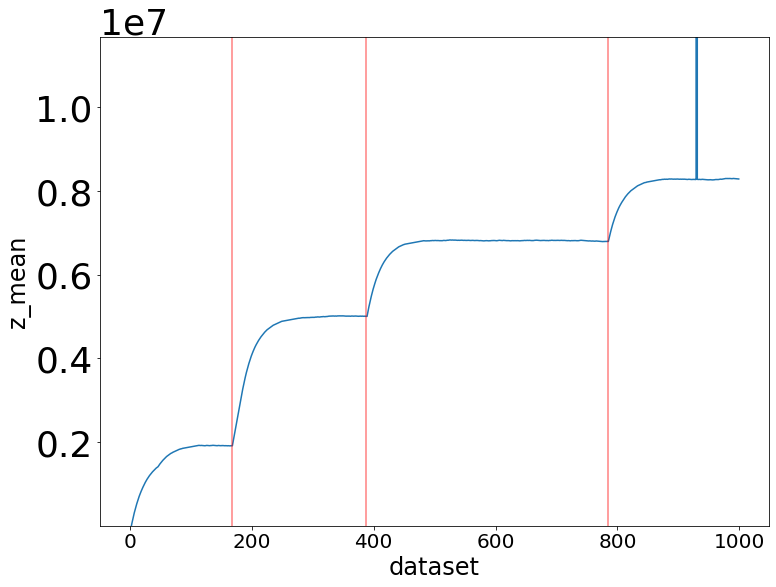

In [175]:
plt.plot(z_mean)
plt.axvline(168,color="red",alpha=0.5)
plt.axvline(388,color="red",alpha=0.5)
plt.axvline(785,color="red",alpha=0.5)
plt.ylabel("z_mean")
plt.xlabel("dataset")
plt.ylim(np.mean(z_mean)/1000,np.mean(z_mean)*2)

(350000000.0, 450000000.0)

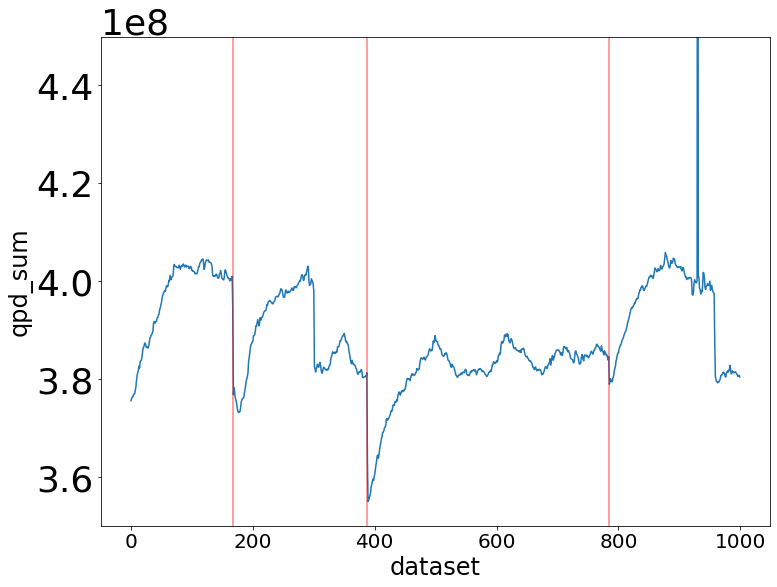

In [176]:
plt.plot(qpd_sum)
plt.axvline(168,color="red",alpha=0.5)
plt.axvline(388,color="red",alpha=0.5)
plt.axvline(785,color="red",alpha=0.5)
plt.ylabel("qpd_sum")
plt.xlabel("dataset")
plt.ylim(3.5e8,4.5e8)

In [9]:
file = load_dir(dirname,FOI,start_file=165,max_file=10)

1000  files in folder
10  files loaded


269.105


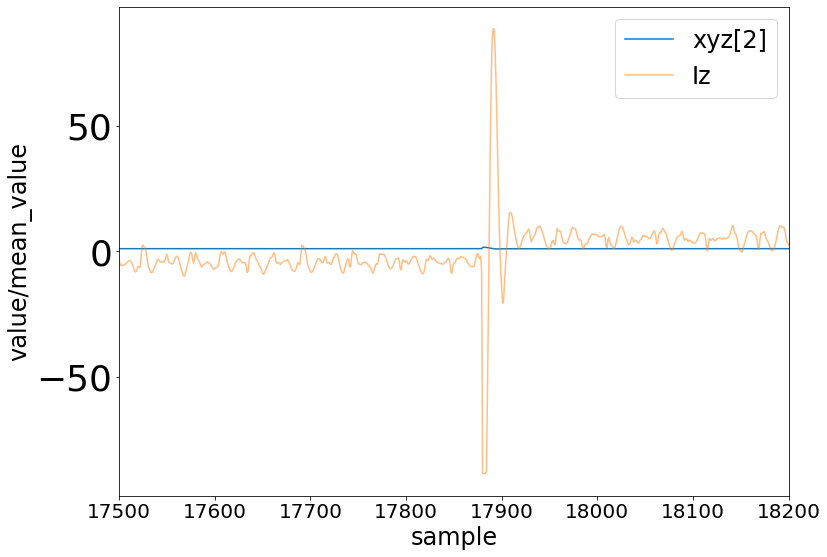

In [23]:
i=3
z=np.arange(0,5e4,0.1)
print(file[i].bead_height)
#plt.plot(file[i].x2/file[i].x2.mean(),label="x2")

plt.plot(file[i].xyz[2]/file[i].xyz[2].mean(),label="xyz[2]")
plt.plot(file[i].feedback[2]/file[i].feedback[2].mean(),alpha=0.5,label="Iz")
plt.ylabel("value/mean_value")
plt.xlabel("sample")
plt.legend()
plt.xlim(17500,18200)
plt.show()

In [24]:
file2 = load_dir(dirname,FOI,start_file=385,max_file=10)

1000  files in folder
10  files loaded


279.668


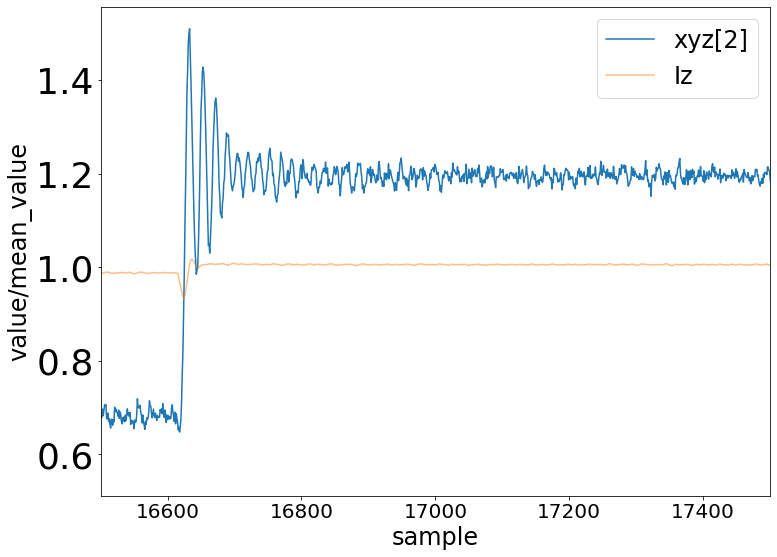

In [32]:
i=3
print(file2[i].bead_height)
#plt.plot(file2[i].z2/file2[i].z2.mean(),label="z2")
#plt.plot(file2[i].x2/file2[i].x2.mean(),alpha=0.5,label="x2")
#plt.plot(z,file2[i].spin_data/file2[i].spin_data.mean(),alpha=0.5,label="spin")
plt.plot(file2[i].xyz[0]/file2[i].xyz[0].mean(),label="xyz[2]")
plt.plot(file2[i].Iz/file2[i].Iz.mean(),alpha=0.5,label="Iz")
plt.ylabel("value/mean_value")
plt.xlabel("sample")
plt.legend()
plt.xlim(16500,17500)
plt.show()

In [232]:
# load the images
image = load_npy_files("/data/new_trap/20200713/Bead1/Millicharge/WithSpin0714/Pictures/Discharge_16*.npy")

/data/new_trap/20200713/Bead1/Millicharge/WithSpin0714/Pictures/Discharge_16.npy 0
/data/new_trap/20200713/Bead1/Millicharge/WithSpin0714/Pictures/Discharge_160.npy 1
/data/new_trap/20200713/Bead1/Millicharge/WithSpin0714/Pictures/Discharge_161.npy 2
/data/new_trap/20200713/Bead1/Millicharge/WithSpin0714/Pictures/Discharge_162.npy 3
/data/new_trap/20200713/Bead1/Millicharge/WithSpin0714/Pictures/Discharge_163.npy 4
/data/new_trap/20200713/Bead1/Millicharge/WithSpin0714/Pictures/Discharge_164.npy 5
/data/new_trap/20200713/Bead1/Millicharge/WithSpin0714/Pictures/Discharge_165.npy 6
/data/new_trap/20200713/Bead1/Millicharge/WithSpin0714/Pictures/Discharge_166.npy 7
/data/new_trap/20200713/Bead1/Millicharge/WithSpin0714/Pictures/Discharge_167.npy 8
/data/new_trap/20200713/Bead1/Millicharge/WithSpin0714/Pictures/Discharge_168.npy 9
/data/new_trap/20200713/Bead1/Millicharge/WithSpin0714/Pictures/Discharge_169.npy 10


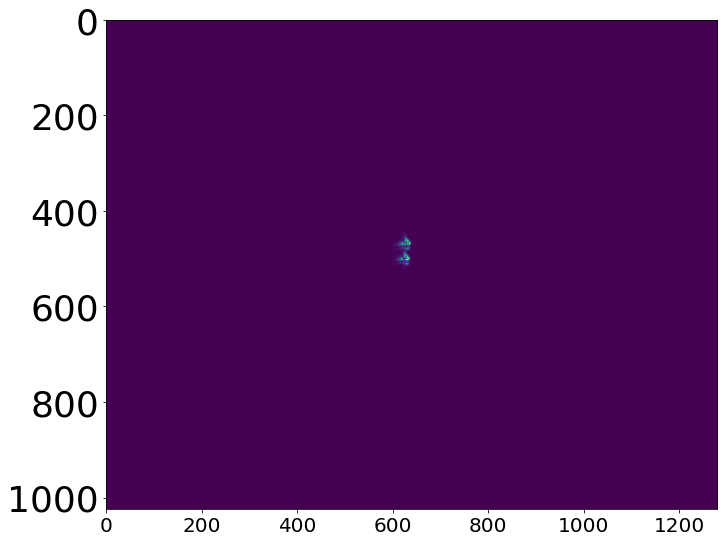

In [256]:
plt.imshow(image[8]+image[10])


In [314]:
file3 = load_dir(dirname,FOI,start_file=780,max_file=10)

1000  files in folder
10  files loaded


271.62


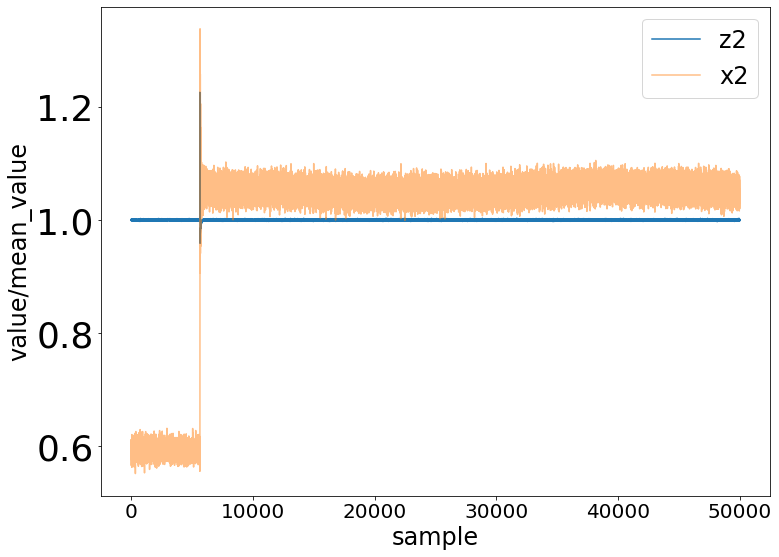

In [327]:
i=5
print(file3[i].bead_height)
plt.plot(file3[i].z2/file3[i].z2.mean(),label="z2")
plt.plot(file3[i].x2/file3[i].x2.mean(),alpha=0.5,label="x2")
plt.ylabel("value/mean_value")
plt.xlabel("sample")
plt.legend()
plt.show()